In [2]:
import pandas as pd
# 1 Carga el dataset train.csv en un DataFrame llamado df
df = pd.read_csv('data/train.csv')

#2 -> muestra las 10 primeras lineas
print(df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [7]:
# Imprime las columnas disponibles y sus tipos de datos

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [11]:
# 4 Muestra un resumen estadístico (describe) solo de las columnas numéricas
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [12]:
# 5 Cuenta cuántos valores nulos hay en cada columna

print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
# 6 Elimina la columna Cabin (tiene muchos valores nulos)

df_drop_sin_cabin = df.drop("Cabin",axis=1)

In [ ]:
# 7 Rellena los valores nulos de la columna Age con la media de edad
media = df["Age"].mean()

print(df["Age"].fillna(media)) #para rellenar la columna, con inplace=True o asignando a df["Age"]



0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


In [24]:
# 8 Filtra el DataFrame para mostrar solo los pasajeros mayores de 60 años

print(df[df["Age"]>60.0])

     PassengerId  Survived  Pclass                                       Name  \
33            34         0       2                      Wheadon, Mr. Edward H   
54            55         0       1             Ostby, Mr. Engelhart Cornelius   
96            97         0       1                  Goldschmidt, Mr. George B   
116          117         0       3                       Connors, Mr. Patrick   
170          171         0       1                  Van der hoef, Mr. Wyckoff   
252          253         0       1                  Stead, Mr. William Thomas   
275          276         1       1          Andrews, Miss. Kornelia Theodosia   
280          281         0       3                           Duane, Mr. Frank   
326          327         0       3                  Nysveen, Mr. Johan Hansen   
438          439         0       1                          Fortune, Mr. Mark   
456          457         0       1                  Millet, Mr. Francis Davis   
483          484         1  

In [26]:
# 9 Muestra cuántas personas sobrevivieron (Survived == 1) y cuántas no

df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [27]:
# 10 Cuenta cuántos pasajeros había en cada clase (Pclass)

df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [31]:
# 11 Calcula la edad media por clase (Pclass)
df.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [34]:
# 12 Calcula el porcentaje de supervivencia según el género

df.groupby("Sex")["Survived"].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [ ]:
# 13 ¿Quién pagó la tarifa más alta (Fare) y cuánto fue?

df.sort_values("Fare",ascending=False).head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S


In [11]:
# 14 Agrupa por clase y género y muestra la tasa de supervivencia combinada

df.groupby(["Pclass","Sex"])["Survived"].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [19]:
# 15 Cuenta cuántos pasajeros iban solos (SibSp == 0 y Parch == 0)

len(df[(df["SibSp"] == 0) & (df["Parch"]==0)])

537

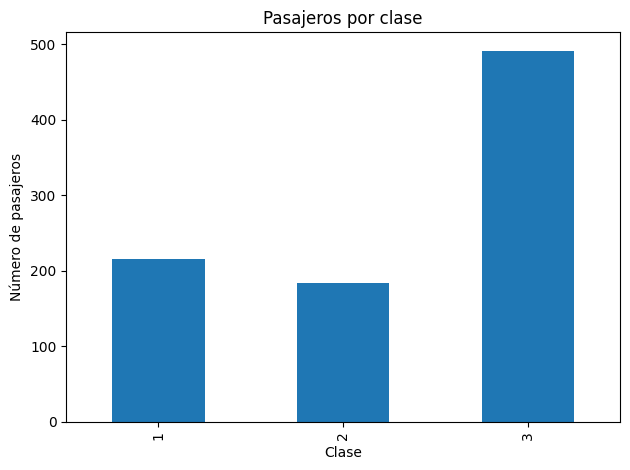

In [27]:
# 16 Haz un gráfico de barras del número de pasajeros por clase

import matplotlib.pyplot as plt

df["Pclass"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Clase")
plt.ylabel("Número de pasajeros")
plt.title("Pasajeros por clase")
plt.tight_layout()
plt.show()

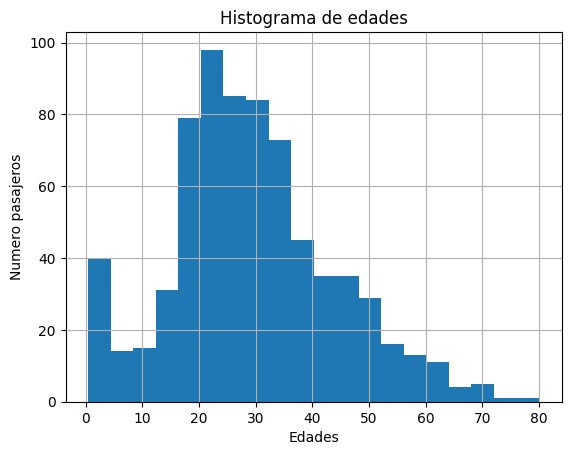

In [32]:
# 17 Haz un histograma de las edades de los pasajeros

df["Age"].hist(bins=20)
plt.xlabel("Edades")
plt.ylabel("Numero pasajeros")
plt.title("Histograma de edades")
plt.show()



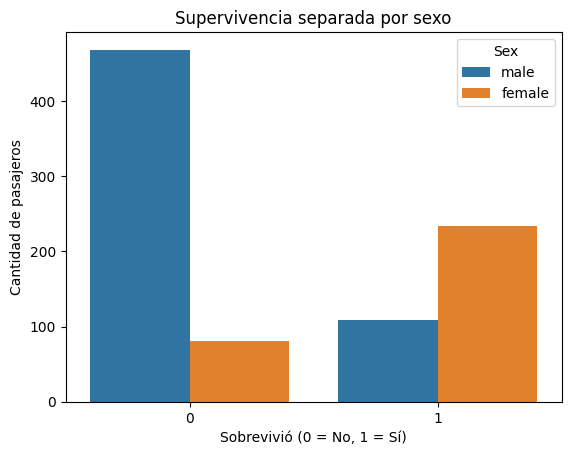

In [35]:
# 18 Haz un countplot de Survived separado por Sex

import seaborn as sbn
sbn.countplot(data=df,x="Survived",hue="Sex")
plt.xlabel("Sobrevivió (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de pasajeros")
plt.title("Supervivencia separada por sexo")
plt.show()

<Axes: >

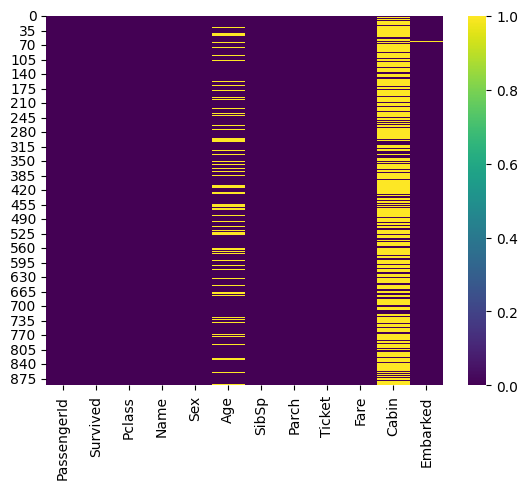

In [36]:
# 19 Haz un heatmap de los valores nulos del DataFrame

sbn.heatmap(df.isnull(),cmap="viridis")

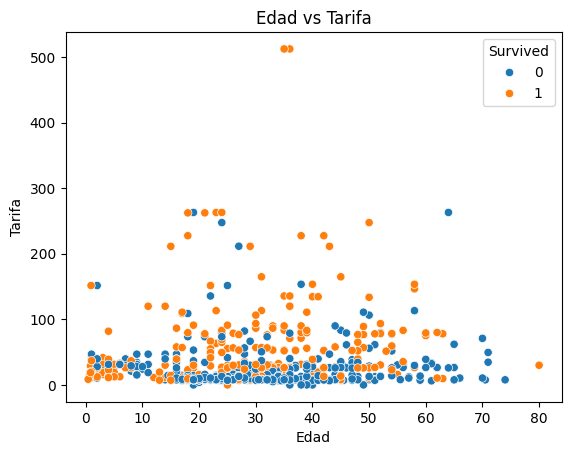

In [40]:
# 20 Haz un gráfico de dispersión de Age vs Fare, coloreado por Survived

sbn.scatterplot(data=df,x="Age",y="Fare",hue="Survived")
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.title("Edad vs Tarifa")
plt.show()

In [ ]:
# 21 Crea una columna llamada Menor que indique si el pasajero tiene menos de 18 años



In [ ]:
# 22 Crea una columna llamada Menor que indique si el pasajero tiene menos de 18 años

df["Menor"] = df["Age"]< 18

df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Menor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,True


In [50]:
# 23 Crea una nueva columna FamilySize que sume SibSp + Parch

df["FamilySize"] = df["SibSp"] + df["Parch"]

df["FamilySize"].value_counts()

FamilySize
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [ ]:
# 24 ¿Cuántos pasajeros menores de edad sobrevivieron?

len(df[(df["Menor"]) & (df["Survived"] ==1)])

61

In [63]:
# 25 ¿Quiénes eran los pasajeros más jóvenes que fallecieron?
df[(df["Menor"]) & (df["Survived"] == 0)].sort_values("Age")[["Name","Age"]]

,Name,Age
164,"Panula, Master. Eino Viljami",1.0
386,"Goodwin, Master. Sidney Leonard",1.0
119,"Andersson, Miss. Ellis Anna Maria",2.0
7,"Palsson, Master. Gosta Leonard",2.0
205,"Strom, Miss. Telma Matilda",2.0
297,"Allison, Miss. Helen Loraine",2.0
16,"Rice, Master. Eugene",2.0
642,"Skoog, Miss. Margit Elizabeth",2.0
824,"Panula, Master. Urho Abraham",2.0
374,"Palsson, Miss. Stina Viola",3.0


In [74]:
# 26 ¿Qué título (Mr., Mrs., Miss, etc.) aparece en los nombres? Extrae esta información y agrúpala

df["Titulo"]=df["Name"].str.extract(r",\s*(\w+)\.")

df.groupby("Titulo").size()

Titulo
Capt          1
Col           2
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
dtype: int64

In [75]:
# 27 Guarda tus resultados o versiones del DataFrame en un nuevo .csv con df.to_csv("mi_resultado.csv", index=False)

df.to_csv("mi_resultado_titanic.csv",index=False)